<a href="https://colab.research.google.com/github/sfansaria/GaussianMixtureModel-Anomaly-Detection/blob/main/GMM_anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  import os
  import datetime
  import pandas as pd
  pd.set_option('display.width',1000)
  pd.set_option('display.max_rows', 500)
  pd.set_option('display.max_columns',500)

  from IPython.core.display import display, HTML
  display(HTML("<style>.container{width:90% !important ; } </style>"))
except Exception as e:
  print("Library not found: ",e)

In [ ]:
data = pd.read_excel('/content/drive/My Drive/ml_datasets/Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#RFM->Recency-Frequency-Monetary
#Recency--->last purchase
#Frequency--->how many purchase
#Monetary--->Money

data = data[['InvoiceDate','CustomerID','UnitPrice']]
data


,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
541904,2011-12-09 12:50:00,12680.0,0.85
541905,2011-12-09 12:50:00,12680.0,2.10
541906,2011-12-09 12:50:00,12680.0,4.15
541907,2011-12-09 12:50:00,12680.0,4.15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  541909 non-null  datetime64[ns]
 1   CustomerID   406829 non-null  float64       
 2   UnitPrice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 12.4 MB


In [ ]:
#Customer frequency with more than 5 transaction
frequency_customer = data['CustomerID'].value_counts().rename_axis('CustomerID').to_frame('frequency').reset_index()
frequency_customer

,CustomerID,frequency
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
...,...,...
4367,15070.0,1
4368,15753.0,1
4369,17065.0,1
4370,16881.0,1


In [ ]:
#customer which has more than 5 transactions
more_than_5_transaction_customers = list(frequency_customer[frequency_customer['frequency']>5]['CustomerID'])
more_than_5_transaction_customers

[17841.0,
 14911.0,
 14096.0,
 12748.0,
 14606.0,
 15311.0,
 14646.0,
 13089.0,
 13263.0,
 14298.0,
 15039.0,
 14156.0,
 18118.0,
 14159.0,
 14796.0,
 15005.0,
 16033.0,
 14056.0,
 14769.0,
 17511.0,
 13081.0,
 14527.0,
 16549.0,
 14456.0,
 15719.0,
 15555.0,
 16931.0,
 17811.0,
 14505.0,
 12415.0,
 17338.0,
 18283.0,
 17757.0,
 12921.0,
 17675.0,
 15159.0,
 16764.0,
 16904.0,
 13137.0,
 15547.0,
 17920.0,
 16923.0,
 17735.0,
 15529.0,
 16360.0,
 16729.0,
 16241.0,
 15856.0,
 12681.0,
 13969.0,
 16713.0,
 14502.0,
 14415.0,
 13230.0,
 13098.0,
 14194.0,
 14088.0,
 16686.0,
 13694.0,
 17611.0,
 14667.0,
 17238.0,
 17602.0,
 15023.0,
 15358.0,
 15993.0,
 14534.0,
 12867.0,
 17337.0,
 16910.0,
 15861.0,
 17231.0,
 14367.0,
 12471.0,
 12682.0,
 15498.0,
 15356.0,
 17059.0,
 15033.0,
 15998.0,
 14895.0,
 14049.0,
 17346.0,
 16161.0,
 13408.0,
 14730.0,
 13668.0,
 13319.0,
 15640.0,
 17954.0,
 17315.0,
 17139.0,
 12540.0,
 15021.0,
 16558.0,
 12621.0,
 18041.0,
 17220.0,
 18069.0,
 13069.0,


In [ ]:
#merge with the real data
data = data.query("CustomerID in @more_than_5_transaction_customers").reset_index(drop=True)
data

,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
405943,2011-12-09 12:50:00,12680.0,0.85
405944,2011-12-09 12:50:00,12680.0,2.10
405945,2011-12-09 12:50:00,12680.0,4.15
405946,2011-12-09 12:50:00,12680.0,4.15


In [ ]:
data.query("CustomerID == '17846.0'")

,InvoiceDate,CustomerID,UnitPrice


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d/%m/%y')
data

,InvoiceDate,CustomerID,UnitPrice
0,2010-12-01 08:26:00,17850.0,2.55
1,2010-12-01 08:26:00,17850.0,3.39
2,2010-12-01 08:26:00,17850.0,2.75
3,2010-12-01 08:26:00,17850.0,3.39
4,2010-12-01 08:26:00,17850.0,3.39
...,...,...,...
405943,2011-12-09 12:50:00,12680.0,0.85
405944,2011-12-09 12:50:00,12680.0,2.10
405945,2011-12-09 12:50:00,12680.0,4.15
405946,2011-12-09 12:50:00,12680.0,4.15


In [ ]:
#RFM ------------------->Mean -> Min -> Max -> Std.dev
#Recency

current_date = max(data['InvoiceDate']) + datetime.timedelta(days=1)

recency_merchant = data.pivot_table(index='CustomerID', aggfunc={'InvoiceDate': 'max'}).reset_index().rename(columns={'InvoiceDate': 'max_date'})
recency_merchant['recency'] = recency_merchant.apply(lambda row: (current_date - row['max_date']).total_seconds()/60/60, axis=1)
recency_merchant

,CustomerID,max_date,recency
0,12347.0,2011-12-07 15:52:00,68.966667
1,12348.0,2011-09-25 13:13:00,1823.616667
2,12349.0,2011-11-21 09:51:00,458.983333
3,12350.0,2011-02-02 16:01:00,7460.816667
4,12352.0,2011-11-03 14:37:00,886.216667
...,...,...,...
4060,18280.0,2011-03-07 09:52:00,6674.966667
4061,18281.0,2011-06-12 10:53:00,4345.950000
4062,18282.0,2011-12-02 11:43:00,193.116667
4063,18283.0,2011-12-06 12:02:00,96.800000


In [ ]:
#frequency
data['Created_Time_prev'] = data.sort_values(['InvoiceDate', 'CustomerID'],ascending=True).groupby('CustomerID')['InvoiceDate'].shift(1)
data['hour_diff'] = data.apply(lambda row: (row['InvoiceDate'] - row['Created_Time_prev']).total_seconds()/60/60, axis=1)
data['hour_diff' + '_mean'], data['hour_diff' + '_std'], data['hour_diff' + '_count'] = data['hour_diff'], data['hour_diff'], data['hour_diff']
frequency_merchant = data.pivot_table(index='CustomerID', aggfunc={'hour_diff' + '_mean': 'mean','hour_diff'+'_std':'std', 'hour_diff'+'_count':'count'}).reset_index().rename(columns={"hour_diff_mean": 'frequency'})
frequency_merchant

,CustomerID,hour_diff_count,frequency,hour_diff_std
0,12347.0,181,48.402855,272.267560
1,12348.0,30,226.202222,819.007397
2,12349.0,72,0.000000,0.000000
3,12350.0,16,0.000000,0.000000
4,12352.0,94,66.404965,460.189061
...,...,...,...,...
4060,18280.0,9,0.000000,0.000000
4061,18281.0,6,0.000000,0.000000
4062,18282.0,12,237.844444,793.682479
4063,18283.0,755,10.614305,96.276584


In [ ]:
#monetary Median
monetary_merchant = data.pivot_table(index='CustomerID', aggfunc={'UnitPrice': 'median'}).reset_index().rename(columns={'UnitPrice': 'monetary'})
monetary_merchant

,CustomerID,monetary
0,12347.0,2.015
1,12348.0,0.550
2,12349.0,2.550
3,12350.0,1.650
4,12352.0,3.950
...,...,...
4060,18280.0,3.750
4061,18281.0,1.650
4062,18282.0,2.950
4063,18283.0,1.650


In [ ]:
#mean
monetary_merchant_mean = data.pivot_table(index='CustomerID', aggfunc={'UnitPrice': 'mean'}).reset_index().rename(columns={'UnitPrice': 'monetary_mean'})
monetary_merchant_mean

,CustomerID,monetary_mean
0,12347.0,2.644011
1,12348.0,5.764839
2,12349.0,8.289041
3,12350.0,3.841176
4,12352.0,23.274737
...,...,...
4060,18280.0,4.765000
4061,18281.0,5.622857
4062,18282.0,4.821538
4063,18283.0,1.614987


In [ ]:
#min
monetary_merchant_min = data.pivot_table(index='CustomerID', aggfunc={'UnitPrice': 'min'}).reset_index().rename(columns={'UnitPrice': 'monetary_min'})
monetary_merchant_min

,CustomerID,monetary_min
0,12347.0,0.25
1,12348.0,0.29
2,12349.0,0.42
3,12350.0,0.85
4,12352.0,0.65
...,...,...
4060,18280.0,2.55
4061,18281.0,0.42
4062,18282.0,0.29
4063,18283.0,0.29


In [ ]:
#max
monetary_merchant_max = data.pivot_table(index='CustomerID', aggfunc={'UnitPrice': 'max'}).reset_index().rename(columns={'UnitPrice': 'monetary_max'})
monetary_merchant_max

,CustomerID,monetary_max
0,12347.0,12.75
1,12348.0,40.00
2,12349.0,300.00
3,12350.0,40.00
4,12352.0,376.50
...,...,...
4060,18280.0,9.95
4061,18281.0,16.95
4062,18282.0,12.75
4063,18283.0,15.95


In [ ]:
#std
monetary_merchant_std = data.pivot_table(index = 'CustomerID', aggfunc={'UnitPrice':'std'}).reset_index().rename(columns={'UnitPrice':'monetary_std'})
monetary_merchant_std

,CustomerID,monetary_std
0,12347.0,2.255381
1,12348.0,13.400323
2,12349.0,35.028021
3,12350.0,9.334751
4,12352.0,70.438671
...,...,...
4060,18280.0,2.472072
4061,18281.0,7.778641
4062,18282.0,4.862801
4063,18283.0,1.096060


In [ ]:
#concatenate

rfm = pd.concat([frequency_merchant["frequency"],monetary_merchant,monetary_merchant_mean["monetary_mean"],monetary_merchant_min["monetary_min"],monetary_merchant_max["monetary_max"],monetary_merchant_std["monetary_std"],recency_merchant['recency']],axis=1)
rfm

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency
0,48.402855,12347.0,2.015,2.644011,0.25,12.75,2.255381,68.966667
1,226.202222,12348.0,0.550,5.764839,0.29,40.00,13.400323,1823.616667
2,0.000000,12349.0,2.550,8.289041,0.42,300.00,35.028021,458.983333
3,0.000000,12350.0,1.650,3.841176,0.85,40.00,9.334751,7460.816667
4,66.404965,12352.0,3.950,23.274737,0.65,376.50,70.438671,886.216667
...,...,...,...,...,...,...,...,...
4060,0.000000,18280.0,3.750,4.765000,2.55,9.95,2.472072,6674.966667
4061,0.000000,18281.0,1.650,5.622857,0.42,16.95,7.778641,4345.950000
4062,237.844444,18282.0,2.950,4.821538,0.29,12.75,4.862801,193.116667
4063,10.614305,18283.0,1.650,1.614987,0.29,15.95,1.096060,96.800000


In [ ]:
data_GMM = rfm.copy()
data_GMM

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency
0,48.402855,12347.0,2.015,2.644011,0.25,12.75,2.255381,68.966667
1,226.202222,12348.0,0.550,5.764839,0.29,40.00,13.400323,1823.616667
2,0.000000,12349.0,2.550,8.289041,0.42,300.00,35.028021,458.983333
3,0.000000,12350.0,1.650,3.841176,0.85,40.00,9.334751,7460.816667
4,66.404965,12352.0,3.950,23.274737,0.65,376.50,70.438671,886.216667
...,...,...,...,...,...,...,...,...
4060,0.000000,18280.0,3.750,4.765000,2.55,9.95,2.472072,6674.966667
4061,0.000000,18281.0,1.650,5.622857,0.42,16.95,7.778641,4345.950000
4062,237.844444,18282.0,2.950,4.821538,0.29,12.75,4.862801,193.116667
4063,10.614305,18283.0,1.650,1.614987,0.29,15.95,1.096060,96.800000


In [ ]:
#data_table,

#import library
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

#make it array

X = data_GMM[['recency','frequency','monetary','monetary_mean','monetary_min','monetary_max','monetary_std']].values

#Gaussian Mixture

gmm = GaussianMixture(n_components=5,covariance_type='spherical').fit(X)
labels = gmm.predict(X)
score = gmm.predict_proba(X)
data_GMM['labels'] = labels
data_GMM

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency,labels
0,48.402855,12347.0,2.015,2.644011,0.25,12.75,2.255381,68.966667,4
1,226.202222,12348.0,0.550,5.764839,0.29,40.00,13.400323,1823.616667,3
2,0.000000,12349.0,2.550,8.289041,0.42,300.00,35.028021,458.983333,0
3,0.000000,12350.0,1.650,3.841176,0.85,40.00,9.334751,7460.816667,1
4,66.404965,12352.0,3.950,23.274737,0.65,376.50,70.438671,886.216667,3
...,...,...,...,...,...,...,...,...,...
4060,0.000000,18280.0,3.750,4.765000,2.55,9.95,2.472072,6674.966667,1
4061,0.000000,18281.0,1.650,5.622857,0.42,16.95,7.778641,4345.950000,2
4062,237.844444,18282.0,2.950,4.821538,0.29,12.75,4.862801,193.116667,4
4063,10.614305,18283.0,1.650,1.614987,0.29,15.95,1.096060,96.800000,4


In [ ]:
X

array([[6.89666667e+01, 4.84028545e+01, 2.01500000e+00, ...,
        2.50000000e-01, 1.27500000e+01, 2.25538101e+00],
       [1.82361667e+03, 2.26202222e+02, 5.50000000e-01, ...,
        2.90000000e-01, 4.00000000e+01, 1.34003233e+01],
       [4.58983333e+02, 0.00000000e+00, 2.55000000e+00, ...,
        4.20000000e-01, 3.00000000e+02, 3.50280212e+01],
       ...,
       [1.93116667e+02, 2.37844444e+02, 2.95000000e+00, ...,
        2.90000000e-01, 1.27500000e+01, 4.86280071e+00],
       [9.68000000e+01, 1.06143046e+01, 1.65000000e+00, ...,
        2.90000000e-01, 1.59500000e+01, 1.09605959e+00],
       [1.03535000e+03, 5.52874396e+01, 1.25000000e+00, ...,
        2.90000000e-01, 8.50000000e+00, 1.22711519e+00]])

In [ ]:
labels

array([4, 3, 0, ..., 4, 4, 3])

In [ ]:
score

array([[4.00680646e-15, 6.84925971e-41, 8.09985581e-42, 7.51318545e-15,
        1.00000000e+00],
       [1.49650673e-73, 4.71030720e-21, 3.16437971e-10, 1.00000000e+00,
        0.00000000e+00],
       [9.99904174e-01, 1.32973937e-31, 6.00511135e-29, 9.58263568e-05,
        4.61110185e-15],
       ...,
       [1.09496157e-07, 1.79416874e-36, 3.63899064e-36, 6.13048157e-10,
        9.99999890e-01],
       [4.43825495e-14, 6.86031921e-41, 1.55135684e-41, 9.52260105e-15,
        1.00000000e+00],
       [4.44966027e-06, 3.54750998e-27, 6.04728107e-20, 9.99995550e-01,
        1.83474976e-88]])

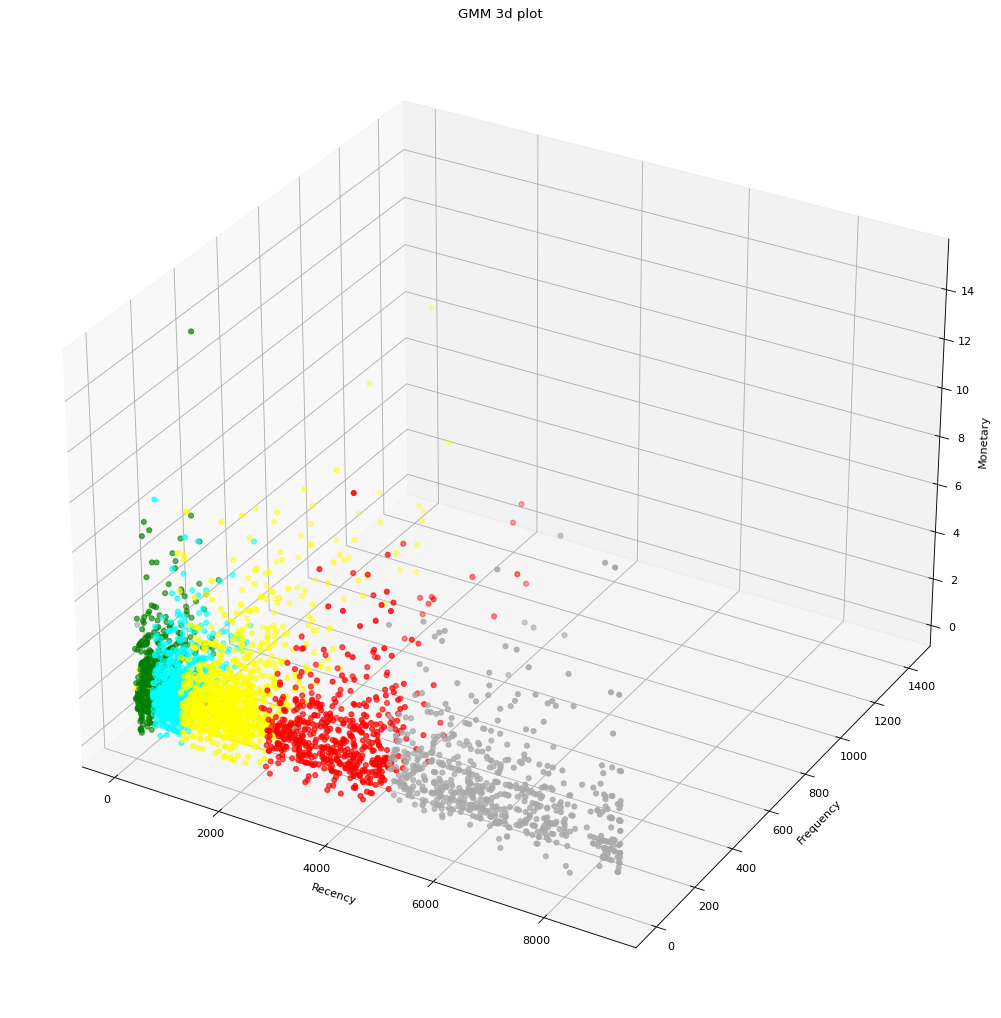

In [ ]:
def three_d_plot(data1,data2,data3,data4):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  import matplotlib
  #fig = plt.figure()
  fig = plt.figure(figsize=(18,16),dpi=80,facecolor='w',edgecolor='k')
  ax = fig.add_subplot(111, projection='3d')
  colors = ['aqua', 'darkgray', 'blue', 'red', 'black', 'yellow','green']
  #ax.scatter(data1,data2,data3,color="black")
  #ax.scatter(data4,data5,data6, color="red",s=150)
  #ax.scatter(data1,data2,data3, s=100, edgecolor="r", facecolor="gold")
  ax.scatter(data1,data2,data3, c=data4, cmap=matplotlib.colors.ListedColormap(colors))
  #plt.legend(loc=2)
  plt.title("GMM 3d plot")
  ax.set_xlabel('Recency')
  ax.set_ylabel('Frequency')
  ax.set_zlabel('Monetary')
  plt.show()
three_d_plot(data_GMM["recency"],data_GMM["frequency"],data_GMM["monetary"],data_GMM["labels"])

In [ ]:
#Score adding
scores = pd.DataFrame(score)
scores.rename(columns={0:'label_zero',1:'label_one',2:'label_two',3:'label_three'},inplace=True)

#Reset Index
data_GMM = data_GMM.reset_index(drop=True)
scores = scores.reset_index(drop=True)
#merge two dataframe
gmm_score = pd.concat([data_GMM,scores],axis=1)
#gmm_score
del data_GMM, scores

In [ ]:
#label_zero
label_zero = gmm_score.query("labels==0").sort_values("label_zero").reset_index(drop=True)
label_zero = label_zero.drop(columns=['label_one','label_two','label_three'])
label_zero = label_zero.rename(columns={'label_zero':'score'})

#label_one
label_one = gmm_score.query("labels==1").sort_values("label_one").reset_index(drop=True)
label_one = label_one.drop(columns=['label_zero','label_two','label_three'])
label_one = label_one.rename(columns = {'label_one':'score'})

#label_two
label_two = gmm_score.query("labels==2").sort_values("label_three").reset_index(drop=True)
label_two = label_two.drop(columns=['label_zero','label_one','label_three'])
label_two = label_two.rename(columns = {'label_two': 'score'})

#label_three
label_three = gmm_score.query("labels==3").sort_values("label_three").reset_index(drop=True)
label_three = label_three.drop(columns = ['label_zero','label_one','label_two'])
label_three = label_three.rename(columns = {'label_three':'score'})

#merging labels
frames = [label_zero,label_one,label_two,label_three]
vertical_stack = pd.concat(frames, axis=0).reset_index(drop=True)


In [ ]:
vertical_stack

,frequency,CustomerID,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,recency,labels,score,4
0,85.833152,17999.0,1.950,2.822903,0.19,16.95,2.630040,908.900000,0,0.518606,3.121391e-63
1,173.411290,15651.0,1.720,2.158437,0.29,4.95,1.656754,892.150000,0,0.525283,1.048337e-61
2,454.634375,16660.0,1.650,2.576471,0.83,5.95,1.848604,405.950000,0,0.653050,1.064112e-16
3,26.314657,15521.0,1.650,4.004600,0.39,125.00,12.692566,886.966667,0,0.677368,1.539517e-60
4,7.383533,16729.0,1.650,2.333982,0.12,125.00,5.103011,881.650000,0,0.737586,8.293948e-60
...,...,...,...,...,...,...,...,...,...,...,...
3168,163.711905,14273.0,2.080,2.484828,0.79,5.95,1.217133,1247.500000,3,1.000000,2.849504e-141
3169,0.000000,16826.0,3.200,3.985000,0.82,12.75,3.312027,1246.750000,3,1.000000,5.899024e-140
3170,0.000000,15740.0,2.890,2.472222,0.29,4.15,1.675394,1198.350000,3,1.000000,2.383972e-127
3171,0.000000,16848.0,1.550,1.710000,0.55,2.95,0.793464,1276.133333,3,1.000000,6.366582e-148


In [ ]:
#MinMax Scaling for scoring

vertical_stack_scaling = vertical_stack[['score']]
vertical_stack_scaling

,score
0,0.518606
1,0.525283
2,0.653050
3,0.677368
4,0.737586
...,...
3168,1.000000
3169,1.000000
3170,1.000000
3171,1.000000


In [ ]:
#Normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_scores = scaler.fit_transform(vertical_stack_scaling)
dataset_scaled_scores = pd.DataFrame(scaled_scores)
dataset_scaled_scores

,0
0,0.034769
1,0.048156
2,0.304339
3,0.353100
4,0.473841
...,...
3168,1.000000
3169,1.000000
3170,1.000000
3171,1.000000


In [ ]:
dataset_scaled_scores.rename(columns={0:'score'}, inplace=True)
#optional
dataset_scaled_scores['score'] = 1 - dataset_scaled_scores['score']
#Drop unnecessary columns
drop_elements = ['score']
vertical_stack = vertical_stack.drop(drop_elements, axis=1)


In [ ]:
#Merge
result = pd.concat([dataset_scaled_scores, vertical_stack],axis=1)

#Reorder data
del dataset_scaled_scores,vertical_stack
result = result[['CustomerID', 'recency','frequency', 'monetary','monetary_mean','monetary_min','monetary_max','monetary_std','labels','score']]

In [ ]:
result

,CustomerID,recency,frequency,monetary,monetary_mean,monetary_min,monetary_max,monetary_std,labels,score
0,17999.0,908.900000,85.833152,1.950,2.822903,0.19,16.95,2.630040,0,0.965231
1,15651.0,892.150000,173.411290,1.720,2.158437,0.29,4.95,1.656754,0,0.951844
2,16660.0,405.950000,454.634375,1.650,2.576471,0.83,5.95,1.848604,0,0.695661
3,15521.0,886.966667,26.314657,1.650,4.004600,0.39,125.00,12.692566,0,0.646900
4,16729.0,881.650000,7.383533,1.650,2.333982,0.12,125.00,5.103011,0,0.526159
...,...,...,...,...,...,...,...,...,...,...
3168,14273.0,1247.500000,163.711905,2.080,2.484828,0.79,5.95,1.217133,3,0.000000
3169,16826.0,1246.750000,0.000000,3.200,3.985000,0.82,12.75,3.312027,3,0.000000
3170,15740.0,1198.350000,0.000000,2.890,2.472222,0.29,4.15,1.675394,3,0.000000
3171,16848.0,1276.133333,0.000000,1.550,1.710000,0.55,2.95,0.793464,3,0.000000


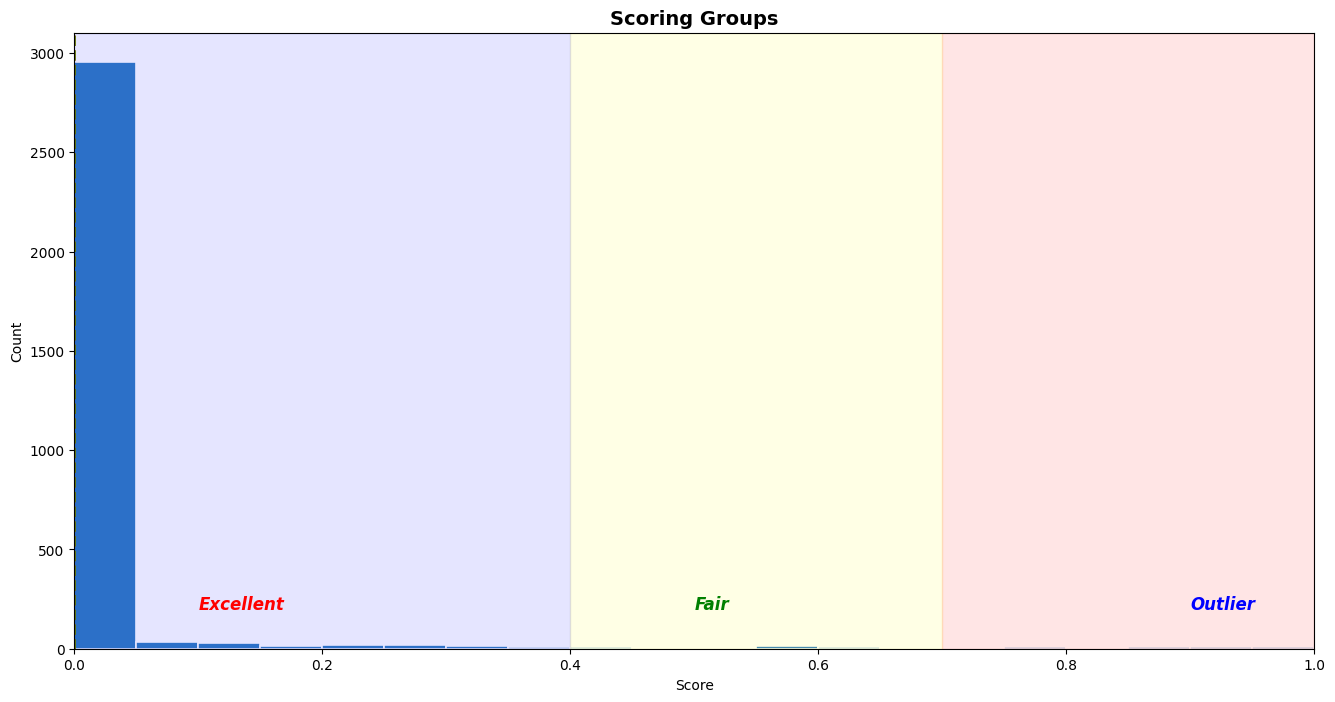

In [ ]:
#Add Scoring Groups to Plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,8))
plt.hist(result['score'],bins=20,edgecolor='white',color='#317DC2',linewidth=1.2)
plt.xlim(0,1)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

#Percentile Lines

plt.axvline(np.percentile(result['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(result['score'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(result['score'],75), color='green', linestyle='dashed',linewidth=2, alpha=0.6)

#Text
plt.text(0.10, 200, 'Excellent', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(0.50, 200, 'Fair', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(0.9, 200, 'Outlier', color='blue', fontweight='bold', style='italic', fontsize=12)

#Shading between Percentiles
plt.axvspan(0, 0.40, alpha=0.1, color='blue')
plt.axvspan(0.40, 0.70, alpha=0.1, color='yellow')
plt.axvspan(0.70, 1, alpha=0.1, color='red')


